In [10]:
from model.model import *
from processing_pipeline import *

In [9]:
%load_ext autoreload
%autoreload 2

In [2]:
download()
alldat = load()
print("Data Loaded. Proceeding to Preprocessing...")
session = 12

Loading data. Patience, padawan ...
Data Loaded. Proceeding to Preprocessing...


In [4]:
dfs = pd.concat([preprocess(alldat, i) for i in range(39)])

Session No: 0
Session No: 1
Session No: 2
Session No: 3
Session No: 4
Session No: 5
Session No: 6
Session No: 7
Session No: 8
Session No: 9
Session No: 10
Session No: 11
Session No: 12
Session No: 13
Session No: 14
Session No: 15
Session No: 16
Session No: 17
Session No: 18
Session No: 19
Session No: 20
Session No: 21
Session No: 22
Session No: 23
Session No: 24
Session No: 25
Session No: 26
Session No: 27
Session No: 28
Session No: 29
Session No: 30
Session No: 31
Session No: 32
Session No: 33
Session No: 34
Session No: 35
Session No: 36
Session No: 37
Session No: 38


In [5]:
train, test = train_test_split(dfs)

In [7]:
train.shape

(7814, 21)

In [6]:
set(test["session"])

{1, 4, 8, 12, 19, 22, 25, 30, 35}

In [8]:
df = train

In [22]:
import seaborn as sns

def plots_2(df, var = "conf"): 
    for feature in df.columns:
        if df[feature].dtype in [float, int]:
            plt.figure()
            sns.violinplot(df[feature], df[var])  
            plt.xlabel(feature)
            plt.ylabel(var) 

KeyboardInterrupt: 

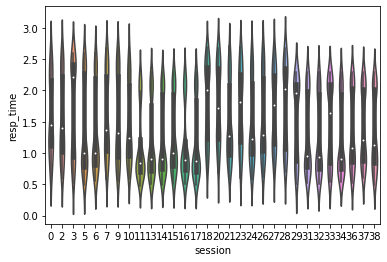

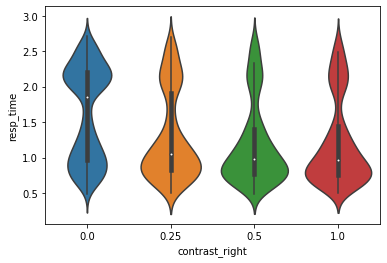

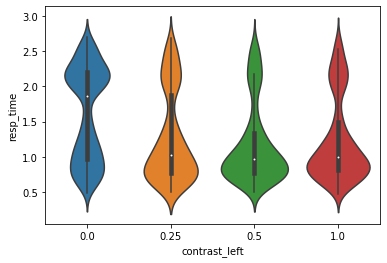

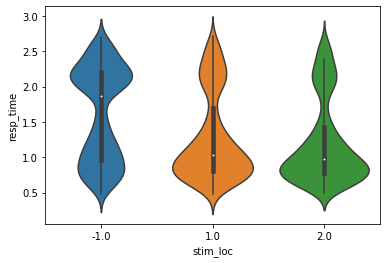

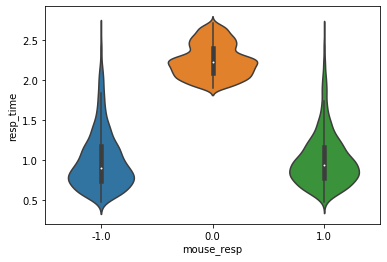

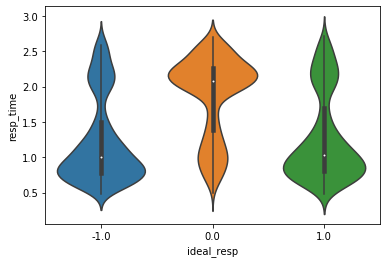

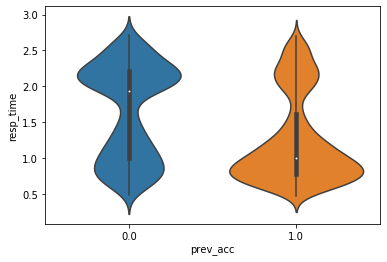

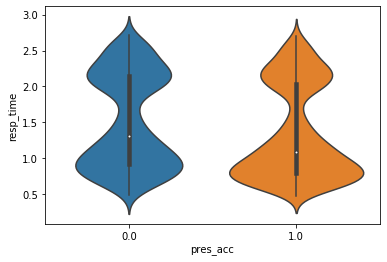

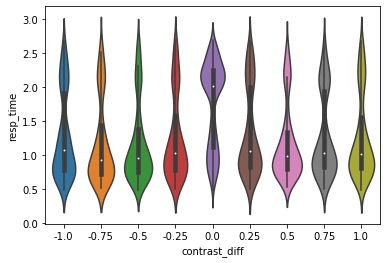

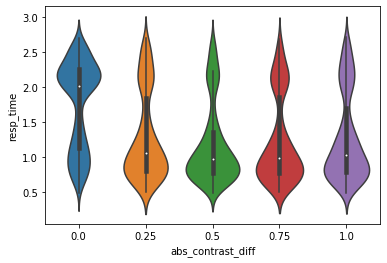

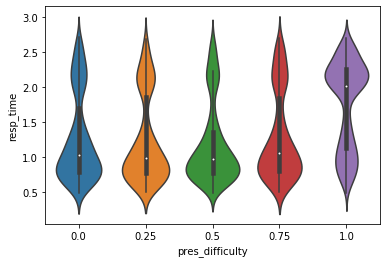

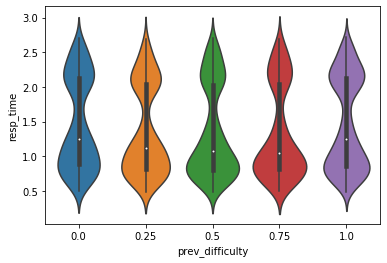

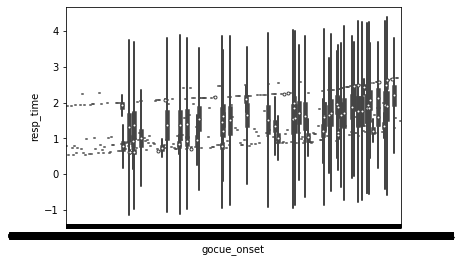

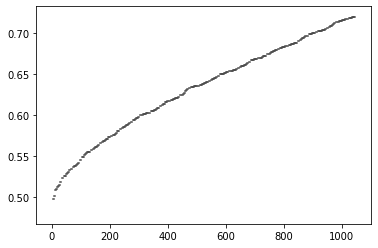

In [23]:
plots_2(df, var = "resp_time")

In [18]:
df["latency"].dtype == float

True